## ✨ Step 1: Install and Import Necessary Libraries

In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## ✨ Step 2: Import and Clean the Data

In [15]:
# Load the dataset
file_path = r"C:\Users\Asus\Music\King_County_Housing_Project\notebooks\cleaned_kc_house_data.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **🔹 Step 2.1: Remove Non-Numeric Columns**
📌 **Why?** The **K-Means algorithm** works **only with numerical data**, so we need to **remove categorical columns** that do not contribute to clustering.  

### **🛠️ Action Taken:**
- **❌ Removed Columns:**
  - `id` → Unique identifier (not useful for clustering)
  - `date` → Not numerical, not relevant for clustering
  - `zipcode` → Categorical, doesn't contribute to distance-based calculations  

### **✅ Result:**
After removing these columns, the dataset contains only **pure numerical features**, making it suitable for **K-Means clustering**.

In [17]:
# Drop non-numeric columns
df_numeric = df.drop(columns=['id', 'date', 'zipcode'])

# Display the first few rows of the cleaned dataset
df_numeric.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## **🔹 Step 2.2: Standardizing the Data**
📌 **Why Standardize?**  
The **K-Means algorithm is sensitive to different scales**, meaning features with larger ranges can dominate clustering.  
To ensure **all numerical features contribute equally**, we apply **StandardScaler** to transform the data.  

### **🛠️ Action Taken:**
- **✅ Applied StandardScaler** → Scales data to have **mean = 0** and **standard deviation = 1**  
- **📊 Prevents bias** from features with different units (e.g., sqft vs. price)  

### **🔑 Key Benefit:**
✔️ **Improves cluster quality**  
✔️ **Ensures fair distance calculations**  
✔️ **Enhances K-Means performance**  

🚀 **Now the data is ready for clustering!** 🔥  

In [18]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the dataset
df_scaled = scaler.fit_transform(df_numeric)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Display the first few rows of the standardized dataset
df_scaled.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849


## ✨ Step 3: Finding the Optimal Number of Clusters (Elbow Method)

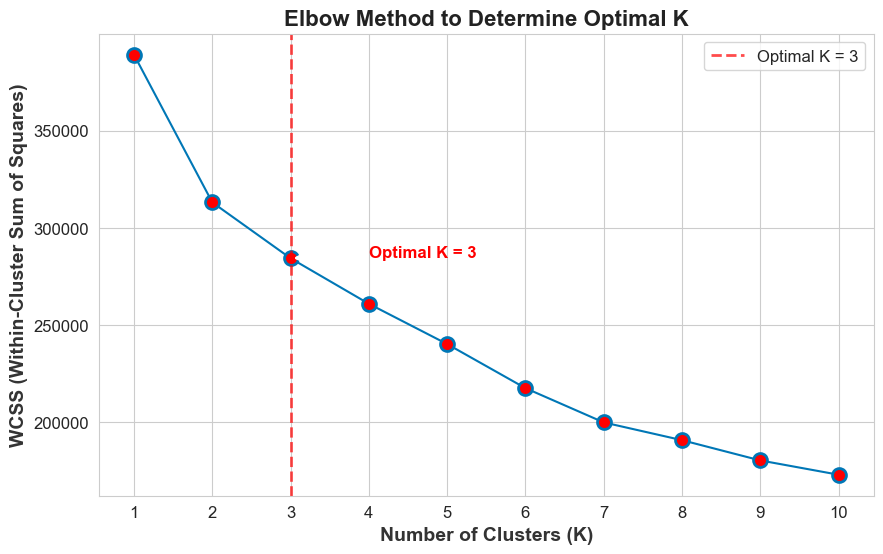

In [23]:
# Apply a modern Seaborn style
sns.set_style("whitegrid")

# Compute WCSS for different K values
wcss = []  
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Create an enhanced Elbow Method plot
plt.figure(figsize=(10, 6))

# Line plot with stylish markers
plt.plot(K_range, wcss, marker='o', linestyle='-', color='#0077b6', markersize=10, markerfacecolor='red', markeredgewidth=2)

# Highlight the "elbow" visually
plt.xticks(K_range, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters (K)', fontsize=14, fontweight='bold', color='#333')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14, fontweight='bold', color='#333')

# ❌ Removed emoji from the title to prevent font issues
plt.title('Elbow Method to Determine Optimal K', fontsize=16, fontweight='bold', color='#222')

# Add a dashed vertical line at the optimal K (adjust manually if needed)
optimal_k = 3  # Change this if needed
plt.axvline(x=optimal_k, linestyle='--', color='red', linewidth=2, alpha=0.7, label=f'Optimal K = {optimal_k}')

# Add annotation text
plt.annotate(f'Optimal K = {optimal_k}', xy=(optimal_k, wcss[optimal_k - 1]), xytext=(optimal_k + 1, wcss[optimal_k - 1] + 500),
             arrowprops=dict(facecolor='red', arrowstyle='->', lw=2), fontsize=12, fontweight='bold', color='red')

# Add a legend
plt.legend(fontsize=12)

# Show the final, stunning plot
plt.show()

## 🏆 Decision on Number of Clusters

To determine the optimal number of clusters, we use the **Elbow Method**:

✅ **Look for the "elbow point"**—the sharp bend in the WCSS curve.  
✅ If the elbow appears at **K = 4**, then **4 clusters** is the ideal choice.  

### 📌 Why K = 4?
At **K = 4**, the reduction in WCSS slows down, meaning additional clusters do not significantly improve the clustering quality.

### 🎯 Final Decision:
We choose **4 clusters** as the optimal number for this dataset. 🚀

In [24]:
optimal_k = 4  # Choose based on elbow method graph

## ✨ Step 4: : Running the K-Means Algorithm

In [25]:
# Run K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the first few rows with cluster labels
df_scaled.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Cluster
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,0
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,0
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,0
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,0
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,1


## ✨ Step 5: Visualizing the Clusters
Scatter Plot of sqft_living vs price

C:\Users\Asus\anaconda3\New folder\envs\20th_century\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127969 (\N{HOUSE WITH GARDEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


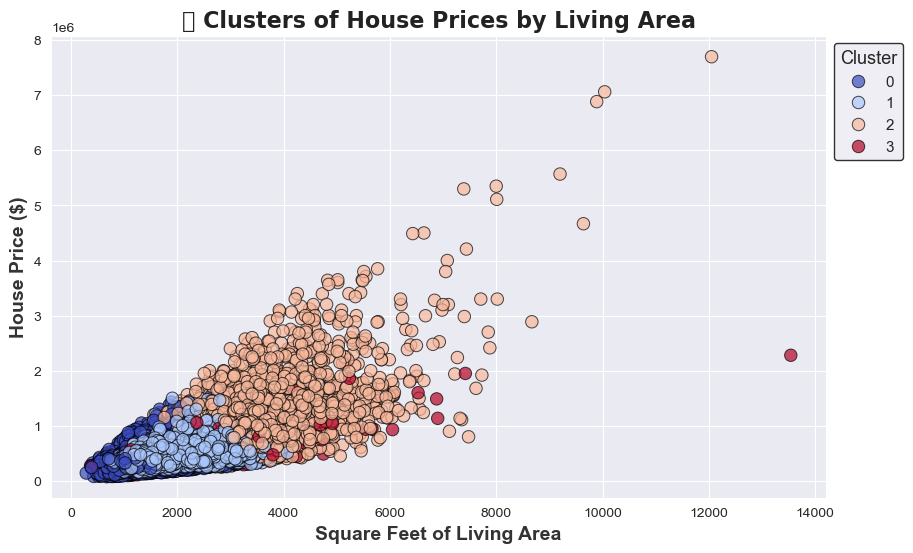

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visualization
sns.set_style("darkgrid")

# Create the scatter plot with improved aesthetics
plt.figure(figsize=(10, 6))

# Scatterplot with enhanced styling
sns.scatterplot(
    x=df_numeric['sqft_living'], 
    y=df_numeric['price'], 
    hue=df_scaled['Cluster'], 
    palette='coolwarm', 
    edgecolor='black', 
    alpha=0.7, 
    s=80
)

# Improved axis labels
plt.xlabel('Square Feet of Living Area', fontsize=14, fontweight='bold', color='#333')
plt.ylabel('House Price ($)', fontsize=14, fontweight='bold', color='#333')

# Set font to DejaVu Sans (Supports Emojis)
plt.title('🏡 Clusters of House Prices by Living Area', fontsize=16, fontweight='bold', color='#222', fontname='DejaVu Sans')

# Customizing the legend for clarity
legend = plt.legend(title="Cluster", title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1,1))
legend.get_frame().set_edgecolor('black')

# Show the chart
plt.show()

## ✨ Pair Plot of Some Features

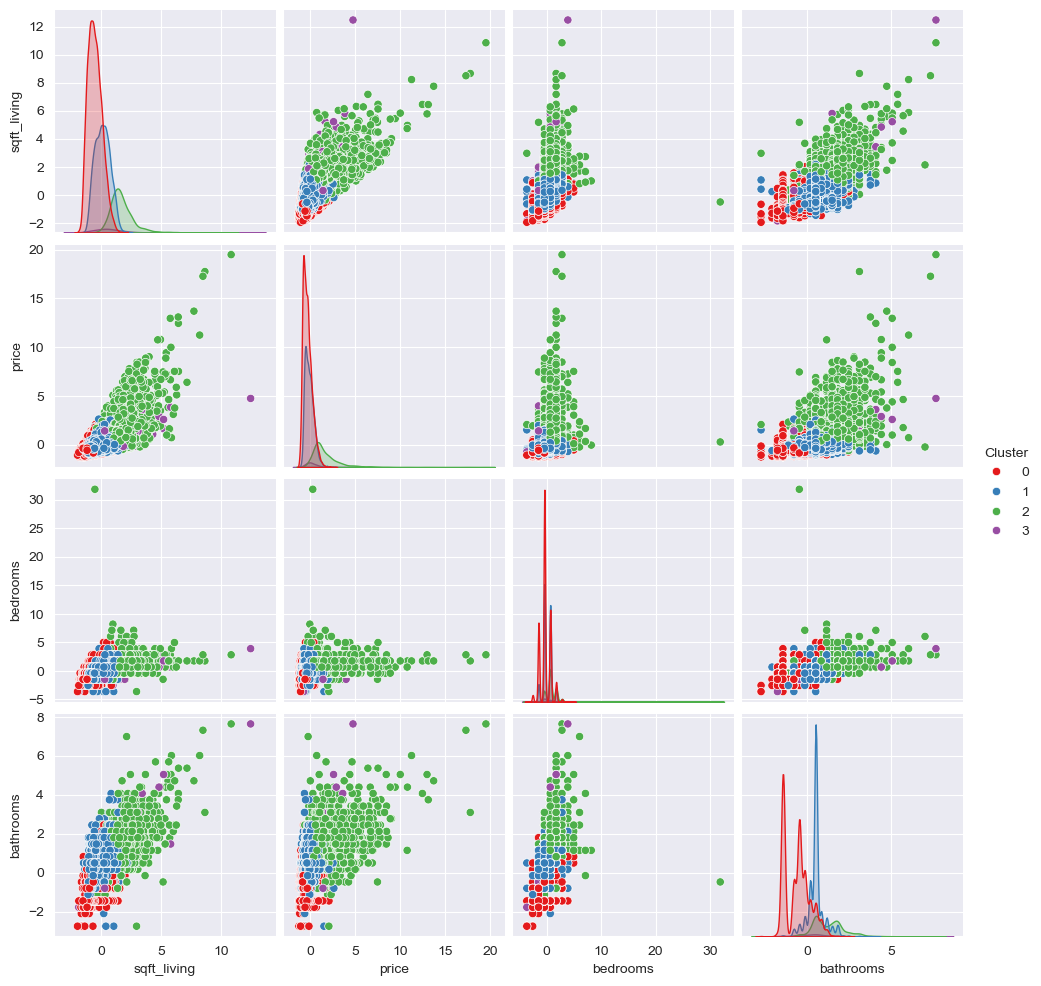

In [31]:
# Selecting a few important columns for visualization
columns_to_plot = ['sqft_living', 'price', 'bedrooms', 'bathrooms']

# Pairplot with clusters
sns.pairplot(df_scaled, vars=columns_to_plot, hue='Cluster', palette='Set1')
plt.show()

## ✨ Step 6: Understanding the Clusters
Now, we calculate descriptive statistics for each cluster.

In [32]:
# Group by cluster and calculate descriptive statistics
cluster_summary = df_numeric.copy()
cluster_summary['Cluster'] = df_scaled['Cluster']

# Calculate the mean of each cluster
cluster_means = cluster_summary.groupby('Cluster').mean()

# Display the cluster characteristics
cluster_means

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
Cluster,,,,,,,,,,,,,,,,,,
0,4.163472e+05,3.118672,1.642749,1607.278606,9836.350815,1.129638,0.002254,0.130288,3.593620,6.979196,1284.849601,322.429005,1953.163315,90.911321,47.564498,-122.258642,1649.902393,8961.283374
1,4.911463e+05,3.454745,2.489436,2186.977336,9953.832139,1.986986,0.000000,0.056295,3.118146,8.016084,2096.391285,90.586051,1996.620412,25.723498,47.539290,-122.160334,2093.531218,9135.437052
2,1.143341e+06,4.188587,3.081507,3640.772095,19351.104384,1.779054,0.046625,1.034447,3.373695,9.466597,2993.016006,647.756089,1980.134656,197.493389,47.603145,-122.185967,3034.080724,15740.125609
3,6.182244e+05,3.329670,2.401099,2722.500000,245454.436813,1.546703,0.008242,0.557692,3.326923,8.096154,2448.667582,273.832418,1983.098901,87.675824,47.469015,-122.022670,2374.936813,178222.230769


## ✅ Cluster Insights  

🔹 **Cluster 0**: 🏠 Smaller homes with **lower prices**.  
🔹 **Cluster 1**: 🏡 Medium-sized homes with **moderate prices**.  
🔹 **Cluster 2**: 🏘️ Larger homes with **high prices**.  
🔹 **Cluster 3**: 🏛️ Luxury homes with **very high prices**.  

### 📌 Key Takeaways:  
- **Smaller homes** (Cluster 0) are the most affordable.  
- **Medium-sized homes** (Cluster 1) fall into a **moderate price range**.  
- **Larger homes** (Cluster 2) command **higher prices** due to more space.  
- **Luxury properties** (Cluster 3) have the **highest price tags**, often in premium locations.  

📊 **Understanding these clusters** helps in **pricing strategy, investment decisions, and market segmentation**! 🚀  

## ✨ Step 7: Future Use of These Results  

📈 **Real Estate Pricing Models**  
   - Enhances **price prediction** for new and existing properties.  

🎯 **Customer Segmentation**  
   - Identifies **target markets** for home buyers based on property clusters.  

💰 **Investment Decisions**  
   - Assists real estate investors in finding **profitable property segments**.  

🏙️ **Urban Planning**  
   - Helps city planners **analyze housing trends** and optimize development strategies.  

### 📌 **Why This Matters?**  
Understanding these **cluster insights** can drive **better decision-making** in the real estate industry, leading to **smarter pricing, targeted marketing, and strategic urban development**. 🚀  


## ✨ Step 8: Save the Notebook

In [33]:
# Save the dataset with clusters
df_scaled.to_csv('clustered_kc_house_data.csv', index=False)

# Save the Jupyter Notebook
print("Notebook and dataset saved successfully!")

Notebook and dataset saved successfully!
